###### <h1><center> WebScraping </h1>
<h1><center> Anno Accademico 2022-2023 </h1>
<h1><center>  Docente: Laura Ricci </h1>
<h1><center>  Lezione 6 </h1>
<h1><center>    Pandas: DataFrames</h1>
<h1><center> 16 Febbraio 2025 </h1>

## Assignment 5: Correzione

In [1]:
import pandas as pd
superheroes =[ "Batman","Superman","Spider.man","Iron-Man","Captain America","Wonder Woman"]
strength_levels = (100, 120, 90, 95, 110, 120)

* utilizzare le lista di superheroes per popolare un oggetto di tipo *Series*
* utilizzare la tupla di strenght_levels per popolare un oggetto di tipo *Series*

## Assignment 5: Correzione

In [2]:
pd.Series(superheroes)

0             Batman
1           Superman
2         Spider.man
3           Iron-Man
4    Captain America
5       Wonder Woman
dtype: object

## Assignment 5: Correzione

In [3]:
pd.Series(data = strength_levels)

0    100
1    120
2     90
3     95
4    110
5    120
dtype: int64

## Assignment 5: Correzione

* creare una **Series** con i **superheroes** come index labels e **strength_level** come valore. 
* assegnare la series ottenuta alla variabile *heroes*

In [4]:
heroes = pd.Series(
         data = strength_levels, index = superheroes)
heroes

Batman             100
Superman           120
Spider.man          90
Iron-Man            95
Captain America    110
Wonder Woman       120
dtype: int64

## Assignment 5: Correzione

* duplicare il livello di forza di ogni *superhero* 

In [5]:
heroes * 2

Batman             200
Superman           240
Spider.man         180
Iron-Man           190
Captain America    220
Wonder Woman       240
dtype: int64

## Assignment 5: Correzione

* convertire la Series heroes in un dizionario Python

In [6]:
dict(heroes)

{'Batman': 100,
 'Superman': 120,
 'Spider.man': 90,
 'Iron-Man': 95,
 'Captain America': 110,
 'Wonder Woman': 120}

## Assignment 6: Correzione

* E' dato il dataset **revolutionary_war.csv** che contiene diverse battaglie combattute durante la Rivoluzione Americana, con la descrizione del nome della battaglia, la data di inizio, lo stato in cui si è combattuta
* uno storico è interessato a conoscere in quale giorno della settimana sono iniziate il maggior numero di Battaglie durante la rivoluzione
* importare il dataset in una series trascurando le colonne che si riferiscono al nome della Battaglia e allo stato, e mantenendo solo la colonna che riguarda la data di inizio della battaglia
* lavorare sulla series risultante

## Assignment 6: Correzione

In [7]:
import pandas as pd
days_of_war = pd.read_csv('DataSets/revolutionary_war.csv', parse_dates = ["Start Date"])
days_of_war

,Battle,Start Date,State
0,Powder Alarm,1774-09-01,Massachusetts
1,Storming of Fort William and Mary,1774-12-14,New Hampshire
2,Battles of Lexington and Concord,1775-04-19,Massachusetts
3,Siege of Boston,1775-04-19,Massachusetts
4,Gunpowder Incident,1775-04-20,Virginia
...,...,...,...
227,Siege of Fort Henry,1782-09-11,Virginia
228,Grand Assault on Gibraltar,1782-09-13,NaN
229,Action of 18 October 1782,1782-10-18,NaN
230,Action of 6 December 1782,1782-12-06,NaN


## Assignment 6: Correzione

In [2]:
import pandas as pd
days_of_war= pd.read_csv("DataSets/revolutionary_war.csv",usecols = ["Start Date"],
                         parse_dates = ["Start Date"]).squeeze('columns')
days_of_war

0     1774-09-01
1     1774-12-14
2     1775-04-19
3     1775-04-19
4     1775-04-20
         ...    
227   1782-09-11
228   1782-09-13
229   1782-10-18
230   1782-12-06
231   1783-01-22
Name: Start Date, Length: 232, dtype: datetime64[ns]

## Assignment 6: Correzione

In [3]:
def day_of_week(date):
    return date.strftime("%A")

* %A data una data, restituisce una stringa con il giorno della settimana, in una stringa completa

## Assignment 6: Correzione

In [10]:
days_of_war.apply(day_of_week)

ValueError: NaTType does not support strftime

## Assignment 6: Correzione

* perchè solleva un errore?
* analizziamo il codice dell'errore
    * *NaTType does not support strftime*
    * e' stato passato a *strftime* un valore nullo
* è possibile che nel  *DataSet* esistano valori *nulli*?

In [4]:
days_of_war.isnull().sum()

4

## Assignment 6: Correzione

* eliminiamo i valori nulli dalla *Series*

In [5]:
days_of_war_not_null=days_of_war.dropna()
days_of_war_not_null

0     1774-09-01
1     1774-12-14
2     1775-04-19
3     1775-04-19
4     1775-04-20
         ...    
227   1782-09-11
228   1782-09-13
229   1782-10-18
230   1782-12-06
231   1783-01-22
Name: Start Date, Length: 228, dtype: datetime64[ns]

## Assignment 6: Correzione

In [6]:
days_of_war_not_null.apply(day_of_week)

0       Thursday
1      Wednesday
2      Wednesday
3      Wednesday
4       Thursday
         ...    
227    Wednesday
228       Friday
229       Friday
230       Friday
231    Wednesday
Name: Start Date, Length: 228, dtype: object

## Assignment 6: Correzione

In [ ]:
days_of_war_not_null_tranformed=days_of_war_not_null.apply(day_of_week)

days_of_war_not_null_tranformed.value_counts()

## Pandas: la gerarchia dei moduli

<center>
<img src="Figures/Hierarchy.jpg" style="width:600px;height:600px;"/>

## Pandas: Tipi di dato
* due tipi di dati principali
    * le **Series** rappresentano dati *1D*
        * ottime per rappresentare sequenze temporali
    * i **Data Frame** rappresentano dati *2D* come un file csv, una tabella di un database, ...
* quale è la relazione tra i due?
    * ogni colonna di un *DataFrame* è una *Series*
* lavoreremo con entrambe le strutture esaminando  data-set reali

## Pandas: DataFrame

* tabella bidimensionale di dati, con indice di riga e di colonna, simile a uno spreadsheet

* le colonne sono oggetti di tipo **Series**, con le convenzioni di indicizzazione delle Series     

<center>
<img src="Figures/DataFrameEx.jpg" style="width:500px;height:300px;" />

* column indexes (*df.columns*) generalmente sono una lista di stringhe o, meno frequentemente, di numeri interi
* row index: interi, stringhe, valori legati al tempo per time series

## Pandas: data frames

* può essere creata a partire da 
    * strutture dati Python 
    * leggendo i dati da supporto esterno: caso più frequente. caricare un data set in un DataFrame
      *  **CSV**
      *  **Excel**
      * **database MySQL**
      * ....(altri formati elencati più avanti)
* un oggeto con tre attributi principali
    * **index**: contiene le etichette delle righe
    * **column** contiene le etichette delle colonne
    * **shape** contiene le dimensioni della tabella
      

## Creare un DataFrame da strutture Python: liste di liste

In [ ]:
from pandas import DataFrame
df = DataFrame ([[10,20,30,40],[50,60,70,80],[90,100,110,120]], 
                index=(list('xyz')), 
                columns=list('abcd'))

<center>
<img src="Figures/DFListofList.jpg" style="width:700px;height:300px;" />

## Creare un DataFrame da strutture Pyton, dizionari di liste

* ogni elemento del dizionario diventa una colonna del **DataFrame**
    * i nomi delle colonne sono uguali a quelli delle chiavi del dizionario
    * valori nella colonna: lista di valori corrispondenti a ogni chiave
    * l'indice di riga è settato, per default,  al **postion index**

In [ ]:
from pandas import DataFrame
df = DataFrame ({ "a": [10,50,90],
                  "b": [20,60,100] ,
                  "c": [30,70,110],
                  "d": [40,80,120]}, index=list('xyz'))
df


## Creare un DataFrame da strutture NumPy

In [ ]:
import numpy as np
random_data = np.random.randint(1,30,[3,5])
random_data


In [ ]:
DataFrame(data=random_data, index=["Mattina", "Pomeriggio", "Sera"],
          columns=["Lunedì", "Martedì", "Mercoledì", "Giovedì","Venerdì"])


## Importare i dati da un file CSV, l'IRIS Data Set 

* uno dei DataSet "storici" e più noti
* 50 campioni presi da ognuna delle 3 specie di *Iris*
    * *Iris Setosa*
    * *Iris Virginica*
    * *Iris Versicolor*
* per ogni campione viene misurata lunghezza e ampiezza
    * dei petali
    * dei sepali
* utilizzato come test case per diverse tecniche di machine learning

## Importare i dati da un file CSV, l'IRIS Data Set 

<center>
<img src="Figures/IrisDS.jpg" style="width:700px;height:300px;"/>
    

## Importare i dati da un file CSV, l'IRIS Data Set 

In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import os
print(os.getcwd())
print()
dataframe = pd.read_csv('DataSets/IrisDataSet.csv')
dataframe


## Struttura del Data Frame

<center>
<img src="Figures/DataFrameLegend.jpg" style="width:1200px;height:350px;"/>

## Struttura del Data Frame

In [ ]:
dataframe.shape

In [ ]:
dataframe.head()

In [ ]:
dataframe.tail()

## Struttura del Data Frame: tipi delle colonne

In [ ]:
dataframe.info()

* tipo *object*
  * dalla documentazione: "The object data type is “a catch-all for columns that Pandas doesn’t recognize 
      as any other specific type.” 
  * nella pratica utilizzato per valori di tipo stringa

## Struttura del Data Frame: statistiche sintetiche

In [ ]:
dataframe.describe()

* fornisce un resoconto sintetico sul contenuto della tabella
* default: analizza solamente le colonne numeriche
    

## Struttura del Data Frame: statistiche sintetiche

In [ ]:
print(dataframe["species"].value_counts())

## Plotting DataFrames: Pandas plotting

In [ ]:
dataframe.hist()
plt.show()

##  Plotting DataFrames: Pandas plotting

In [ ]:
dataframe.plot.scatter(  x="sepal_width", y="sepal_length")
plt.show()

## Plotting Series e DataFrames

In [ ]:
# scatter plot matrix
scatter_matrix(dataframe)
plt.show()

## Rappresentare la distribuzione dei dati con i boxplot

<center>
<img src="Figures/BoxPlot.jpg" style="width:800px;height:600px;" />

## Boxplot: gli outliers

<center>
<img src="Figures/BoxPlotOutliers.jpg" style="width:700px;height:400px;" />

* **Interquantile Range (IQR)**
    * il numero di elementi fino al terzo quartile (75%) meno il numero di elementi al primo quartile (25%)
* **outliers**, anche se non esiste una definizione standard, vengono spesso definiti come: 
    * valori al di sotto del valore **Q1-1.5*IQR**, oppure al di sopra di **Q3+1.5*IQR**
                                                                                                                                 

## Boxplot: trovare gli  outliers

In [ ]:
import pandas as pd
from pandas import Series, DataFrame
trip_distance = pd.read_csv('DataSets/taxi-distance.csv', header=None).squeeze()
passenger_count = pd.read_csv('DataSets/taxi-passenger-count.csv', header=None).squeeze()
df = DataFrame({'trip_distance': trip_distance,
                'passenger_count': passenger_count})
df.head(10)

## Boxplot: trovare gli  outliers

In [ ]:
iqr = (
    df['trip_distance'].quantile(0.75) -
    df['trip_distance'].quantile(0.25)
    )

df[
    df['trip_distance'] < df['trip_distance'].quantile(0.25) - 
    1.5*iqr
]

## Boxplot: trovare gli  outliers

In [ ]:
# outlier distances -- above
df[
    df['trip_distance'] > df['trip_distance'].quantile(0.75) +
    1.5*iqr
]

## Boxplot: trovare gli  outliers

In [ ]:
# mean passenger count for outliers
df['passenger_count'][
    df['trip_distance'] > df['trip_distance'].quantile(0.75) + 1.5*iqr
       ].mean()

## l'Iris dataset:boxplot

In [ ]:
dataframe.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()


## DataFrame: funzioni di accesso

* come indicare se voglio accedere a una riga o a una colonna?
    **loc** e **iloc** per le righe
    * utilizzare le parentesi quadre per le colonne

In [ ]:
df = DataFrame([[10, 20, 30],
                [50, 60, 70],
                [90, 100, 110],
                [120,130,140]],
                index=list('xyzk'),
                columns=list('xyz'))
df

## Dataframe: "square brackets means columns"

In [ ]:
a=df['x']
a

In [ ]:
print(type(a))

## Dataframe: funzioni di accesso

In [ ]:
a=df.loc['x']
a

In [ ]:
type(a)

## Dataframe: funzioni di accesso

In [ ]:
df[k]

* si sta accedendo alla colonna, anche se k è una label di riga, viene sollevato un errore! 

* posso passare una lista di indici di colonna

## Dataframe: eccezione alla regolea "square brackets means columns"

* una slice si riferisce sempre alle righe, non alle colonne

In [11]:
import pandas as pd
from pandas import Series, DataFrame
df = DataFrame([[10, 20, 30],
                [50, 60, 70],
                [90, 100, 110],
                [120,130,140]],
                index=list('xyzk'),
                columns=list('xyz'))
df

,x,y,z
x,10,20,30
y,50,60,70
z,90,100,110
k,120,130,140


In [12]:
df['x':'y']

,x,y,z
x,10,20,30
y,50,60,70


## Dataframe: eccezione alla regola "square brackets means columns"


In [13]:
a=df[['x','y']]
a

,x,y
x,10,20
y,50,60
z,90,100
k,120,130


In [ ]:
## Dataframe: accedere ad un singolo elemento

In [16]:
df = DataFrame([[10, 20, 30],
                [50, 60, 70],
                [90, 100, 110],
                [120,130,140]],
                index=list('xyzk'),
                columns=list('xyz'))
print(df)
df.loc['y','x']

     x    y    z
x   10   20   30
y   50   60   70
z   90  100  110
k  120  130  140


50

## DataFrame: individuare un insieme di elementi

In [17]:
df = DataFrame([[10,20, 30,40,50],
                [60,70,80,90,100],
                [110,120,130,140,150],
                [160,170,180,190,200],
                [210,220,230,240,250]],
                index=list('abcde'),
                columns=list('vwxyz'))
df

,v,w,x,y,z
a,10,20,30,40,50
b,60,70,80,90,100
c,110,120,130,140,150
d,160,170,180,190,200
e,210,220,230,240,250


In [18]:
df.loc[['a','c'],'x']

a     30
c    130
Name: x, dtype: int64

## DataFrame: individuare un insieme di elementi

In [19]:
df = DataFrame([[10,20, 30,40,50],
                [60,70,80,90,100],
                [110,120,130,140,150],
                [160,170,180,190,200],
                [210,220,230,240,250]],
                index=list('abcde'),
                columns=list('vwxyz'))
df

,v,w,x,y,z
a,10,20,30,40,50
b,60,70,80,90,100
c,110,120,130,140,150
d,160,170,180,190,200
e,210,220,230,240,250


In [20]:
df.loc[['a','c'],['v','y']]

,v,y
a,10,40
c,110,140


## il DataSet delle temperature: raggruppare i dati, per anno, in un DataFrame

In [1]:
from pandas import DataFrame
import pandas as pd
series = pd.read_csv('DataSets/daily-min-temperatures.csv', index_col='Date', parse_dates=True).squeeze('columns')
groups = series.groupby(pd.Grouper(freq='YE'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years 


,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
...,...,...,...,...,...,...,...,...,...,...
360,15.5,15.3,13.9,12.2,11.5,14.6,16.2,9.5,13.3,14.0
361,13.3,16.3,11.1,12.0,10.8,14.2,14.2,12.9,11.7,13.6
362,15.6,15.8,16.1,12.6,12.0,13.2,14.3,12.9,10.4,13.5
363,15.2,17.7,20.4,16.0,16.3,11.7,13.3,14.8,14.4,15.7


## il DataSet delle temperature: boxplot

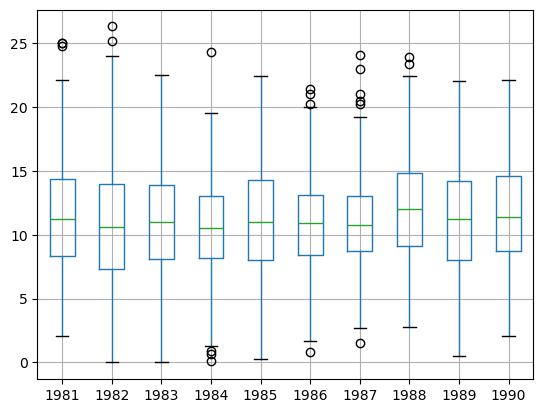

In [2]:
from matplotlib import pyplot
years.boxplot()
pyplot.show()


## Assignment 7

* Generare 10 numeri interi casuali nell'intervallo da 0 a 100.
* Creare una serie contenente le cifre delle decine di quei numeri.
* Quindi, se la serie contiene 10, 25, 32, si vuole  ottenere la serie 1, 2, 3.